In [4]:
#import libraries
import pandas as pd #for the famous dataframes df
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url="https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv"
#all variables have data types
moma=pd.read_csv(url, header=0)
moma.fillna('null')
moma = moma.replace(to_replace=('\(', '\)','0 0'), value="", regex=True)
moma.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,ThumbnailURL,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria Elev...",Otto Wagner,6210,"Austrian, 1841–1918",Austrian,1841,1918,Male,1896,Ink and cut-and-pasted painted pages on paper,...,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"French, born 1944",French,1944,0,Male,1987,Paint and colored pencil on print,...,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,Male,1903,"Graphite, pen, color pencil, ink, and gouache ...",...,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"French and Swiss, born Switzerland 1944",,1944,0,Male,1980,Photographic reproduction with colored synthet...,...,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,Male,1903,"Graphite, color pencil, ink, and gouache on tr...",...,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [6]:
moma.shape

(138151, 29)

In [7]:
moma["Gender"].str.match("Male").sum()

109021

In [8]:
moma["Gender"].str.match("Female").sum()

18945

In [9]:
moma["Gender"].str.match('').sum() #looking for nothing you get everything

136868

In [10]:
ratio = moma["Gender"].str.match("Male").sum()/moma["Gender"].str.match("Female").sum()

In [11]:
ratio

5.75460543679071

In [12]:
moma["URL"].sample(10)

97206                                             NaN
63079      http://www.moma.org/collection/works/67288
39276                                             NaN
97641     http://www.moma.org/collection/works/129139
66527                                             NaN
9059       http://www.moma.org/collection/works/10124
17272                                             NaN
101862                                            NaN
115589    http://www.moma.org/collection/works/172388
20684                                             NaN
Name: URL, dtype: object

In [13]:
female_count_1995 = moma[(moma['Date'] == "1995") & (moma['Gender'] == "Female") ]
female_count_1995.shape[0]

383

In [14]:
male_count_1995 = moma[(moma['Date'] == "1995") & (moma['Gender'] == "Male") ]
male_count_1995.shape[0]

332

In [15]:
ratio = male_count_1995.shape[0]/female_count_1995.shape[0]
ratio

0.8668407310704961

In [16]:
#get all years represented
df_cleanyears = moma[["Date", "Gender"]]
yearlist = df_cleanyears["Date"].unique()
yearlist

array(['1896', '1987', '1903', ..., 'c. 1907-20', 'c. 1918-30',
       'February 1903'], dtype=object)

In [17]:
years = df_cleanyears["Date"]
df_cleanyears = df_cleanyears[(years.str.len() == 4) & (years.str.isdigit())].astype({"Date":int})

In [18]:
df_cleanyears.sort_values("Date", inplace=True)
df_cleanyears.tail()

,Date,Gender
137668,2020,Male
137709,2020,
138102,2020,
137660,2020,Male
138103,2020,


In [19]:
ct = pd.crosstab(df_cleanyears.Date, df_cleanyears.Gender)[["Male", "Female"]]

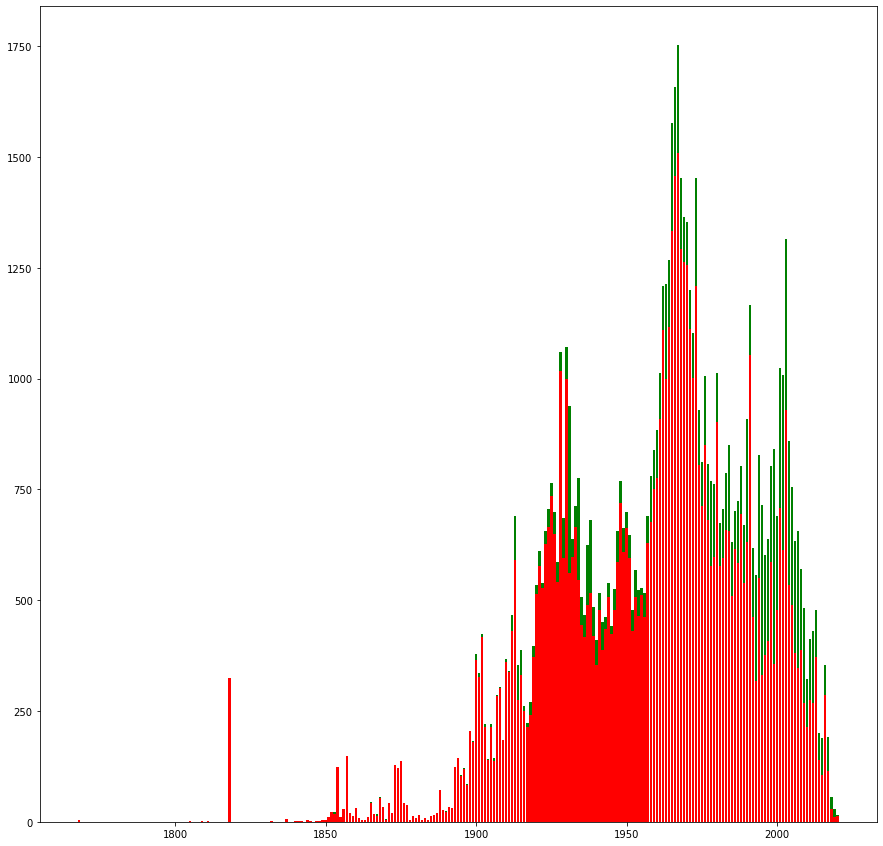

In [24]:
fig, ax = plt.subplots(figsize = (15, 15))

ax.bar(ct.index, ct["Male"], color='r')
ax.bar(ct.index, ct["Female"], bottom=ct["Male"], color='g')

#note bar spacing is irregular because of subpixel values, but the saved output should be perfect. 
plt.savefig("GenderBalanceBars.png", dpi=300)
plt.show()

In [ ]:
#note bar spacing is irregular because of subpixel values, but the saved output should be perfect. 